<a href="https://colab.research.google.com/github/gokulanv/ToyFederatedLearning/blob/master/TensorFlow/Baseline/Genki4k_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://inc.ucsd.edu/mplab/wordpress/wp-content/uploads/genki4k.tar'

path_to_zip = tf.keras.utils.get_file('genki4k.tar', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'genki4k')

29261824/29255680 [==============================] - 1s 0us/step


In [3]:
os.path.dirname(path_to_zip)

'/root/.keras/datasets'

In [16]:
!ls -a /root/.keras/datasets

.  ..  files  genki4k.tar  labels.txt  README


In [0]:
labels = list([])

text_file = open(os.path.join(os.path.dirname(path_to_zip), 'labels.txt'), "r")
lines = text_file.read().split('\n')
for line in lines[:4000]:
    labels.append(int(line.split()[0]))

In [0]:
data = list([])

for filename in sorted(glob.glob(os.path.join(os.path.dirname(path_to_zip), "files/*"))):
    data.append(os.path.join(os.path.dirname(path_to_zip), "files/", filename))

In [0]:
def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [192, 178])
    return image.numpy()

imgs = []
erratic_files = []
for i,filename in enumerate(data):
    img = np.array(parse_image(filename))
    if img.shape[2] == 3:
        imgs.append(img)
    else:
        erratic_files.append(i)
# data = np.concatenate(imgs)
imgs = np.asarray(imgs)
data = imgs
labels = np.asarray(labels)[:, None]
# data = np.reshape(data, (len(data), 192, 178, 3))
# labels = np.reshape(labels, (len(data), 1))
# data = np.expand_dims(data, (1,2,3))
# labels = np.expand_dims(labels, 1)

In [23]:
ix = 0
for r in erratic_files:
    r -= ix
    labels = np.delete(labels, r, 0)
    ix += 1
labels.shape, data.shape

((3998, 1), (3998, 192, 178, 3))

In [24]:
# labels = np.array(labels)
len(labels), len(data), labels.shape, data.shape
# np.concatenate((data, labels), axis = 0).shape

(3998, 3998, (3998, 1), (3998, 192, 178, 3))

In [25]:
from sklearn.utils import shuffle
X, Y = shuffle(data, labels, random_state=0)
X.shape, Y.shape

((3998, 192, 178, 3), (3998, 1))

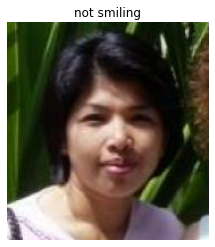

In [26]:

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title('smiling' if label[0] == 1 else 'not smiling')
  plt.axis('off')

idx = 1149
show(X[idx], Y[idx])

In [0]:
split_index = 3500

train_dataset = tf.data.Dataset.from_tensor_slices((X[:split_index], Y[:split_index]))
test_dataset = tf.data.Dataset.from_tensor_slices((X[split_index:], Y[split_index:]))

In [0]:
batch_size = 256

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(192, 178 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# BATCH_SIZE = 64
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
55/55 [==============================] - 117s 2s/step - loss: 0.8798 - accuracy: 0.4800 - val_loss: 0.6893 - val_accuracy: 0.4418
Epoch 2/20
55/55 [==============================] - 117s 2s/step - loss: 0.6816 - accuracy: 0.5157 - val_loss: 0.9824 - val_accuracy: 0.4418
Epoch 3/20
55/55 [==============================] - 116s 2s/step - loss: 0.6674 - accuracy: 0.5680 - val_loss: 0.7660 - val_accuracy: 0.4498
Epoch 4/20
55/55 [==============================] - 116s 2s/step - loss: 0.6292 - accuracy: 0.6109 - val_loss: 0.7605 - val_accuracy: 0.4880
Epoch 5/20
55/55 [==============================] - 116s 2s/step - loss: 0.5900 - accuracy: 0.6597 - val_loss: 0.6617 - val_accuracy: 0.5582
Epoch 6/20
55/55 [==============================] - 115s 2s/step - loss: 0.5347 - accuracy: 0.7111 - val_loss: 0.6800 - val_accuracy: 0.5482
Epoch 7/20
55/55 [==============================] - 115s 2s/step - loss: 0.4847 - accuracy: 0.7489 - val_loss: 0.7718 - val_accuracy: 0.5341
Epoch 8/20
55

In [30]:
#BATCH_SIZE = 4
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
875/875 [==============================] - 424s 484ms/step - loss: 0.7251 - accuracy: 0.4831 - val_loss: 0.6832 - val_accuracy: 0.5060
Epoch 2/20
875/875 [==============================] - 411s 470ms/step - loss: 0.6734 - accuracy: 0.5409 - val_loss: 0.6824 - val_accuracy: 0.4839
Epoch 3/20
875/875 [==============================] - 405s 463ms/step - loss: 0.6135 - accuracy: 0.6491 - val_loss: 0.5900 - val_accuracy: 0.6365
Epoch 4/20
875/875 [==============================] - 405s 463ms/step - loss: 0.5243 - accuracy: 0.7351 - val_loss: 0.5620 - val_accuracy: 0.6807
Epoch 5/20
875/875 [==============================] - 407s 465ms/step - loss: 0.4497 - accuracy: 0.7934 - val_loss: 0.6497 - val_accuracy: 0.6847
Epoch 6/20
875/875 [==============================] - 410s 468ms/step - loss: 0.3503 - accuracy: 0.8431 - val_loss: 0.6658 - val_accuracy: 0.6807
Epoch 7/20
875/875 [==============================] - 419s 479ms/step - loss: 0.2689 - accuracy: 0.8989 - val_loss: 0.9169 -

In [37]:
#BATCH_SIZE = 256
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
14/14 [==============================] - 105s 7s/step - loss: 2.0199 - accuracy: 0.4837 - val_loss: 0.6743 - val_accuracy: 0.4458
Epoch 2/20
14/14 [==============================] - 106s 8s/step - loss: 0.6791 - accuracy: 0.4971 - val_loss: 0.6678 - val_accuracy: 0.4779
Epoch 3/20
14/14 [==============================] - 105s 8s/step - loss: 0.6753 - accuracy: 0.5151 - val_loss: 0.6616 - val_accuracy: 0.5422
Epoch 4/20
14/14 [==============================] - 104s 7s/step - loss: 0.6634 - accuracy: 0.5471 - val_loss: 0.6688 - val_accuracy: 0.5763
Epoch 5/20
14/14 [==============================] - 106s 8s/step - loss: 0.6665 - accuracy: 0.5440 - val_loss: 0.6647 - val_accuracy: 0.4900
Epoch 6/20
14/14 [==============================] - 105s 8s/step - loss: 0.6509 - accuracy: 0.5789 - val_loss: 0.6480 - val_accuracy: 0.5663
Epoch 7/20
14/14 [==============================] - 104s 7s/step - loss: 0.6310 - accuracy: 0.6051 - val_loss: 0.6788 - val_accuracy: 0.5020
Epoch 8/20
14